In [20]:

import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error,r2_score
import os
from sklearn.linear_model import LinearRegression


In [2]:
df=pd.read_csv("Housing.csv")

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
import matplotlib.pyplot as plt

In [5]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


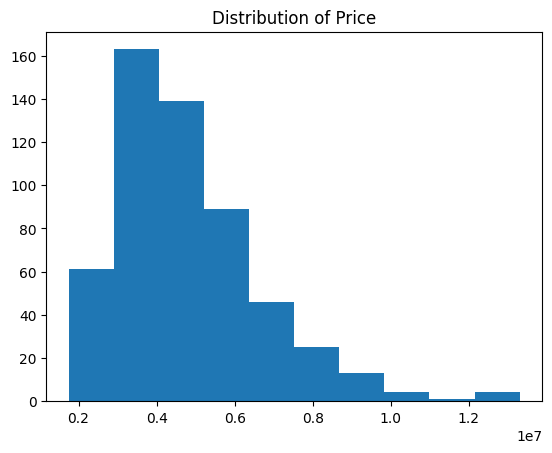

In [8]:
plt.hist(df['price'])
plt.title("Distribution of Price")
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
label_encoder = LabelEncoder()
ordinal_encoder = OrdinalEncoder(categories=[['unfurnished','semi-furnished','furnished']])
df['mainroad'] = label_encoder.fit_transform(df['mainroad'])
df['guestroom'] = label_encoder.fit_transform(df['guestroom'])
df['hotwaterheating'] = label_encoder.fit_transform(df['hotwaterheating'])
df['airconditioning'] = label_encoder.fit_transform(df['airconditioning'])
df['prefarea'] = label_encoder.fit_transform(df['prefarea'])
df['furnishingstatus'] = ordinal_encoder.fit_transform(df[['furnishingstatus']])
df['basement'] = label_encoder.fit_transform(df['basement'])

In [10]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1.0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0.0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1.0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0.0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2.0


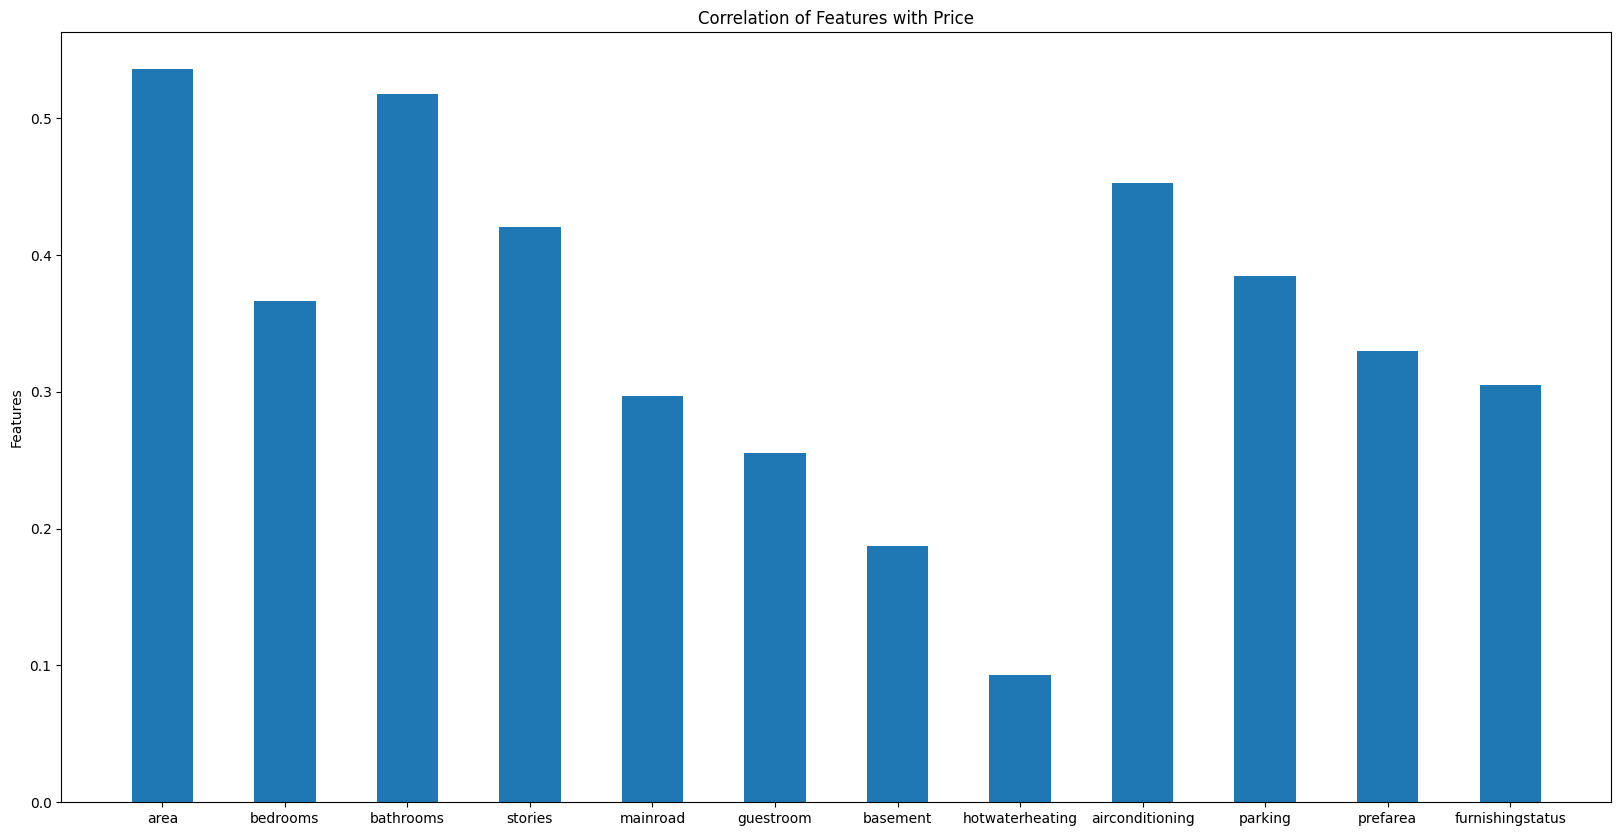

,area,bathrooms,stories,airconditioning
0,7420,2,3,1
1,8960,4,4,1
2,9960,2,2,0
3,7500,2,2,1
4,7420,1,2,1
...,...,...,...,...
540,3000,1,1,0
541,2400,1,1,0
542,3620,1,1,0
543,2910,1,1,0


In [11]:
corr=df.corr()
features=corr['price'].drop('price')
plt.figure(figsize=(20, 10))
plt.bar(features.index,features,width=0.5)
plt.ylabel('Features')
plt.title('Correlation of Features with Price')

plt.show()
highcor=corr.loc[(corr['price'].abs()>0.4)]
cols=highcor['price'].drop('price')



X=df[cols.index]
y=df['price']
X

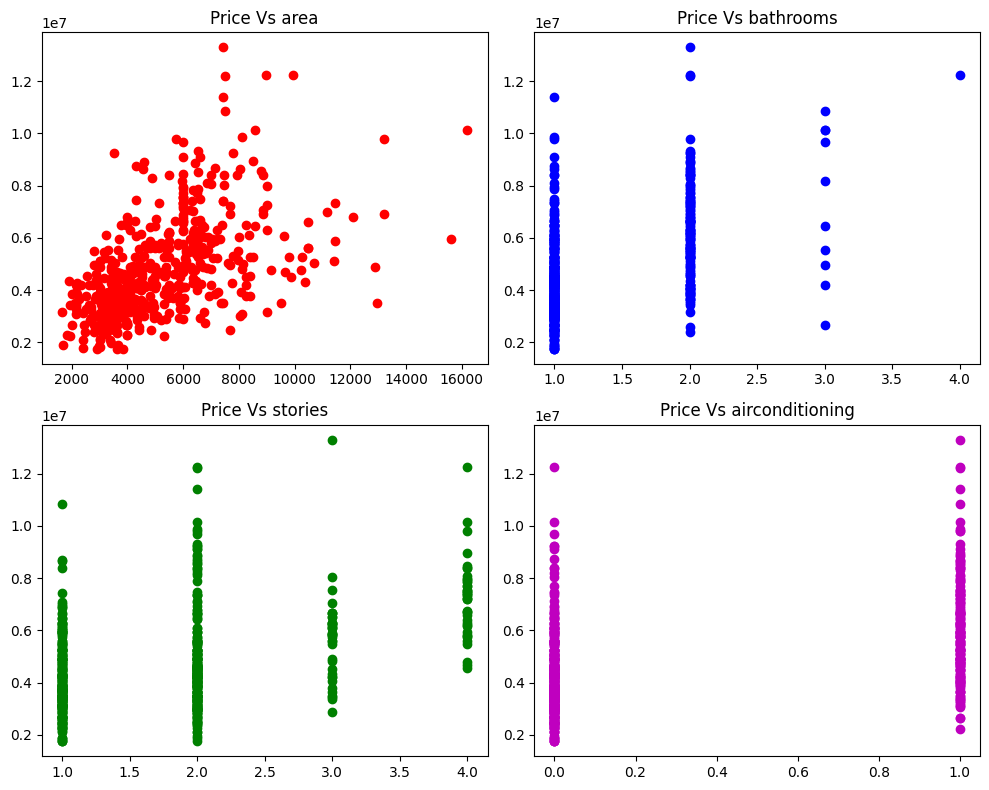

In [12]:

fig,axs=plt.subplots(2,2,figsize=(10,8))
axs[0,0].scatter(X['area'],y,color='r')
axs[0,0].set_title('Price Vs area')
axs[0,1].scatter(X['bathrooms'],y,color='b')
axs[0,1].set_title('Price Vs bathrooms')
axs[1,0].scatter(X['stories'],y,color='g')
axs[1,0].set_title('Price Vs stories')
axs[1,1].scatter(X['airconditioning'],y,color='m')
axs[1,1].set_title('Price Vs airconditioning')
plt.tight_layout()
plt.show()


In [13]:
import numpy as np

def gradient_descent(X, Y, w, b, learning_rate=0.0001, iterations=10000, tol=1e-4):
    m = X.shape[0]
    jdata = []
    for i in range(iterations):
        y_predict = np.dot(X, w) + b
        error = y_predict - Y
        
        cost = np.sum(error**2) / (2 * m)
        jdata.append(cost)
        if i % 1000 == 0:
            
            print(f"Iteration {i}: Cost {cost}, w = {w}, b = {b}")
       
        
        dw = np.dot(error, X) / m
        db = np.sum(error) / m
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        
        
        
        
    
    
    return jdata, w, b


In [14]:

b = 0
w = np.zeros(X.shape[1])
def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_norm = (X - mean) / std
    return X_norm, mean, std
Xnorm,mean,std=normalize(X)


In [15]:
x=Xnorm.values
x

array([[ 1.04672629,  1.42181174,  1.37821692,  1.4726183 ],
       [ 1.75700953,  5.40580863,  2.53202371,  1.4726183 ],
       [ 2.21823241,  1.42181174,  0.22441013, -0.67906259],
       ...,
       [-0.70592066, -0.57018671, -0.92939666, -0.67906259],
       [-1.03338891, -0.57018671, -0.92939666, -0.67906259],
       [-0.5998394 , -0.57018671,  0.22441013, -0.67906259]])

In [16]:

j,w,b=gradient_descent(x,y,w,b,0.001,10000)



Iteration 0: Cost 13106916364659.266, w = [0. 0. 0. 0.], b = 0
Iteration 1000: Cost 2311973076012.2207, w = [538318.0890634  479420.01991037 355012.28789357 395309.7081461 ], b = 3014024.71220283
Iteration 2000: Cost 941481009688.996, w = [681722.11712841 577876.34734768 399345.18125384 454208.59084494], b = 4122267.8090264387
Iteration 3000: Cost 759134004433.5952, w = [725694.99163332 600304.29819323 398857.3672372  457856.93294214], b = 4529763.725262487
Iteration 4000: Cost 734542505555.9423, w = [740873.53773814 606356.28421783 395350.29953074 455023.81507855], b = 4679598.109275328
Iteration 5000: Cost 731211936356.7003, w = [746555.64002433 608341.1175498  393393.54614166 452834.39060747], b = 4734691.526750219
Iteration 6000: Cost 730759930920.9602, w = [748790.62950168 609097.85512848 392545.64334689 451644.53382668], b = 4754949.124290732
Iteration 7000: Cost 730698469298.573, w = [749696.49154169 609410.15122783 392215.91677304 451055.21093146], b = 4762397.750223242
Iterati

In [17]:
def predict(x,w,b):

    return np.dot(x,w)+b


In [18]:
## Prediction Using Gradient Descent Algorithm
ypred=predict(x,w,b)
ypred[:10]

array([ 7622488.18905881, 11036488.67421941,  7079622.83830393,
        7197822.34740038,  5955774.18415803,  7959836.08629746,
        9690624.41843923, 10453361.43498988,  6191090.66057713,
        7496928.7402667 ])

In [21]:

model=LinearRegression().fit(x,y)
ypred_sklearn=model.predict(x)
ypred_sklearn[:10]

array([ 7622697.97100849, 11036793.62329045,  7080015.25811669,
        7198028.2450624 ,  5955952.29702228,  7960061.97069005,
        9690894.24437588, 10453932.32011204,  6191285.40700435,
        7497103.51332004])

In [22]:
Mse_grad = mean_squared_error(y, ypred)
Mse_sklearn = mean_squared_error(y, ypred_sklearn)
R2Score_grad = r2_score(y, ypred)
R2Score_Sklearn = r2_score(y, ypred_sklearn)

print(f"Mean Squared Error (Gradient): {Mse_grad}")
print(f"Mean Squared Error (sklearn): {Mse_sklearn}")
print(f"R² Score (Gradient): {R2Score_grad}")
print(f"R² Score (sklearn): {R2Score_Sklearn}")

Mean Squared Error (Gradient): 1461377570346.6345
Mean Squared Error (sklearn): 1461377519015.2986
R² Score (Gradient): 0.5815219767790866
R² Score (sklearn): 0.5815219914782556
